In [1]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model
import numpy as np
import mimetypes
import argparse
import imutils
import cv2
import os
import sys

2022-05-19 15:53:07.829124: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-05-19 15:53:07.848204: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-19 15:53:07.848233: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [14]:
filePath = "../../data/Datasets_Enhancy/datasets/anorak_bomber_DF/Zip_Collar_Bomber/img_00000004.jpg"

#Load model
print("[INFO] loading object detector...")
model = load_model("bboxRegressor.h5")

[INFO] loading object detector...


In [15]:
#load image
image = load_img(filePath, target_size=(224, 224))
image = img_to_array(image) / 255.0
image = np.expand_dims(image, axis=0)

In [16]:
preds = model.predict(image)[0]
a = model.predict(image)
print(preds)
print(a)
(startX, startY, endX, endY) = preds

1/1 [==============================] - 0s 402ms/step
[0.2321463  0.21765415 0.8547347  0.92273283]
[[0.2321463  0.21765415 0.8547347  0.92273283]]


In [17]:
# load the input image (in OpenCV format), resize it such that it
# fits on our screen, and grab its dimensions
image = cv2.imread(filePath)
image = imutils.resize(image, width=600)
(h, w) = image.shape[:2]


In [18]:
# scale the predicted bounding box coordinates based on the image
# dimensions
startX = int(startX * w)
startY = int(startY * h)
endX = int(endX * w)
endY = int(endY * h)
print(startX, startY, endX, endY)

139 122 512 521


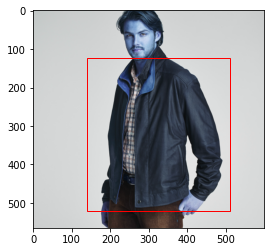

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Create a Rectangle patch
rect = patches.Rectangle((startX, startY), (endX-startX), (endY-startY), linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()